Import required libraries

In [31]:
import pandas as pd
import os
from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
DATA = 'data' #https://data.world/brianray/enron-email-dataset

FILENAMES = [os.path.join(DATA, filename) for filename in os.listdir(DATA)]

In [33]:
FILENAMES

['data/enron_05_17_2015_with_labels_v2_100K_chunk_1_of_6.csv']

#### Import dataset

In [34]:
df = pd.read_csv(FILENAMES[0])

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
df.head()

,Unnamed: 0,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,...,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight,labeled
0,0,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 23:39:00,frozenset({'phillip.allen@enron.com'}),frozenset({'tim.belden@enron.com'}),NaN,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 20:51:00,frozenset({'phillip.allen@enron.com'}),frozenset({'john.lavorato@enron.com'}),Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 10:00:00,frozenset({'phillip.allen@enron.com'}),frozenset({'leah.arsdall@enron.com'}),Re: test,Phillip K Allen,Leah Van Arsdall,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,3,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 13:13:00,frozenset({'phillip.allen@enron.com'}),frozenset({'randall.gay@enron.com'}),NaN,Phillip K Allen,Randall L Gay,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 12:07:00,frozenset({'phillip.allen@enron.com'}),frozenset({'greg.piper@enron.com'}),Re: Hello,Phillip K Allen,Greg Piper,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
Unnamed: 0        100000 non-null int64
Message-ID        100000 non-null object
Date              100000 non-null object
From              100000 non-null object
To                94999 non-null object
Subject           94636 non-null object
X-From            99994 non-null object
X-To              97400 non-null object
X-cc              21747 non-null object
X-bcc             34 non-null object
X-Folder          99994 non-null object
X-Origin          99994 non-null object
X-FileName        99271 non-null object
content           99598 non-null object
user              100000 non-null object
Cat_1_level_1     210 non-null float64
Cat_1_level_2     210 non-null float64
Cat_1_weight      210 non-null float64
Cat_2_level_1     200 non-null float64
Cat_2_level_2     200 non-null float64
Cat_2_weight      200 non-null float64
Cat_3_level_1     166 non-null float64
Cat_3_level_2   

Dropping the unrelevant columns

In [37]:
df = df[df.columns.drop(list(df.filter(regex='^Cat')))]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
Unnamed: 0    100000 non-null int64
Message-ID    100000 non-null object
Date          100000 non-null object
From          100000 non-null object
To            94999 non-null object
Subject       94636 non-null object
X-From        99994 non-null object
X-To          97400 non-null object
X-cc          21747 non-null object
X-bcc         34 non-null object
X-Folder      99994 non-null object
X-Origin      99994 non-null object
X-FileName    99271 non-null object
content       99598 non-null object
user          100000 non-null object
labeled       100000 non-null bool
dtypes: bool(1), int64(1), object(14)
memory usage: 11.5+ MB


Determine howmany emails done in specic year and plot that data

In [39]:
df['Date'].min()

'1980-01-01 00:00:00'

In [40]:
df['Date'].max()

'2020-12-29 20:53:46'

In [41]:
df['Date'].unique()

array(['2001-05-14 23:39:00', '2001-05-04 20:51:00',
       '2000-10-18 10:00:00', ..., '1999-12-22 07:02:00',
       '1999-12-22 06:52:00', '1999-12-20 16:05:00'], dtype=object)

In [42]:
len(df['Date'].unique())

52029

In [43]:
df['Date'] = pd.to_datetime(df.Date)

In [44]:
df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')

In [45]:
len(df['Date'].unique())

913

In [46]:
dfDate = df['Date'].value_counts().sort_index().reset_index()
dfDate.columns = ['Date','Count']

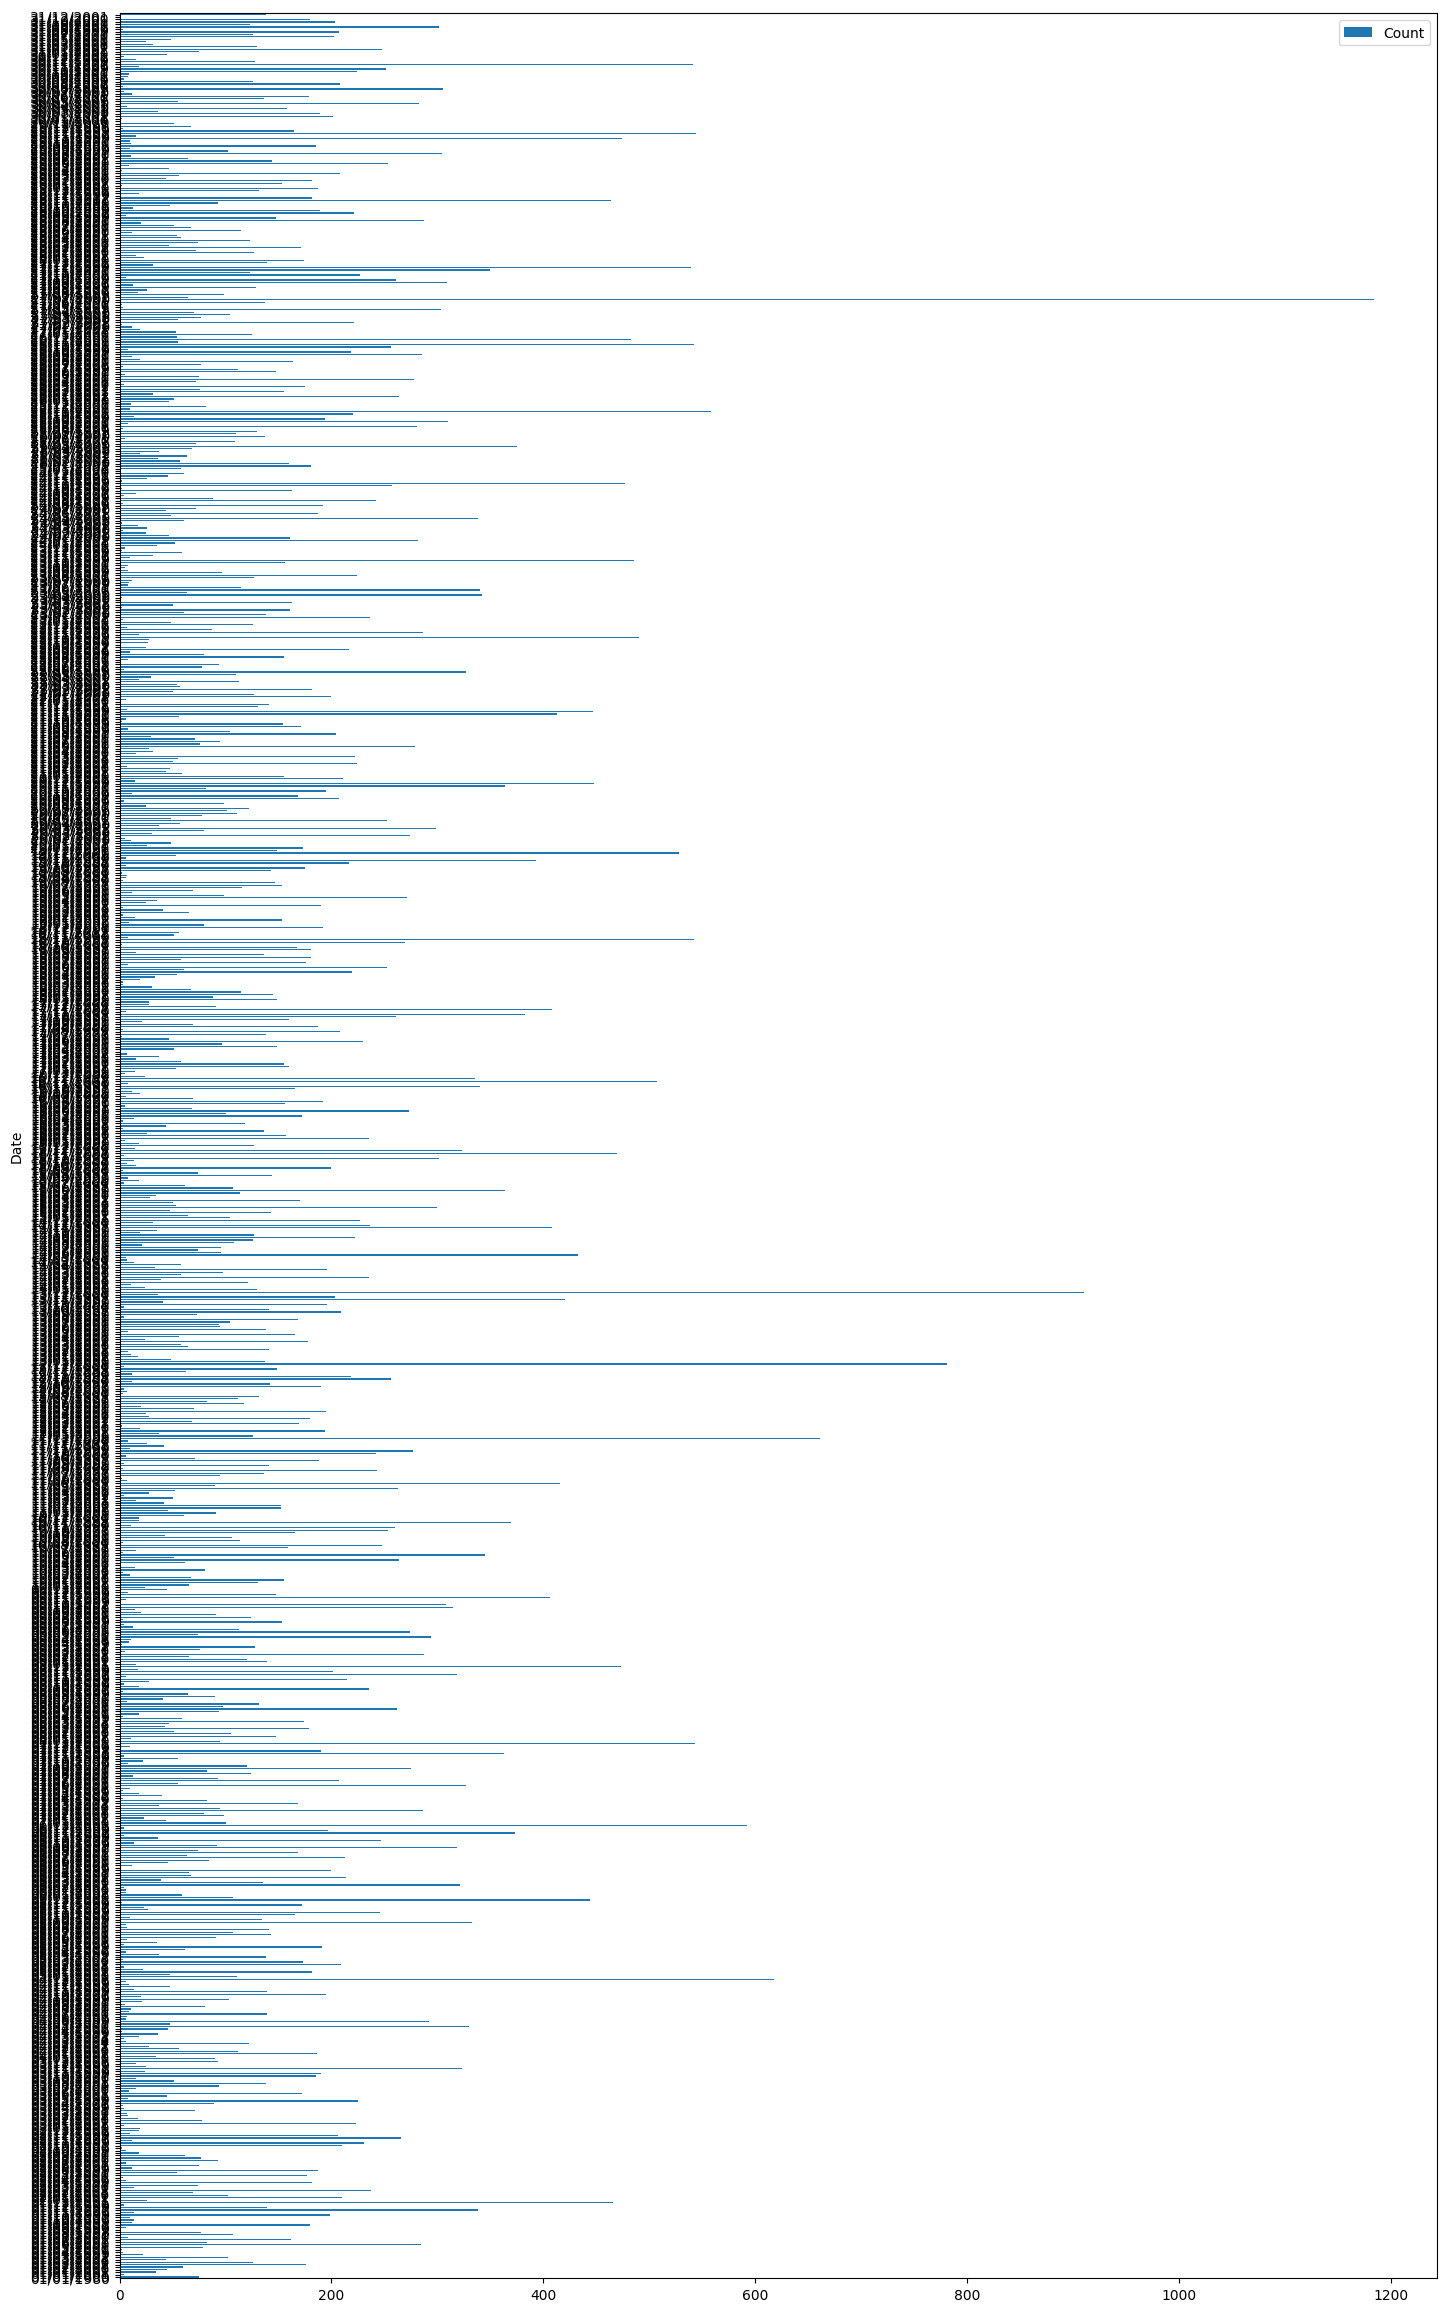

In [47]:
plt.rcParams['figure.dpi'] = 100
# dfDate.plot(kind='bar', ax=0)
dfDate.plot.barh(x='Date', y='Count', figsize=(17, 30))

So according to above plot, we can conclude that its quite distributive but only one date has so many emails so we will remove some of them later to normalize the email data distribution.

<b>Let's find out which date has sent more than 1000 emails.</b>

In [48]:
dfDate['Count'].describe()

count     913.000000
mean      109.529025
std       126.236314
min         1.000000
25%        15.000000
50%        66.000000
75%       165.000000
max      1184.000000
Name: Count, dtype: float64

So 75% mails were sent below 165 mails.However the avg is still at 109. 

In [49]:
dfDate[dfDate['Count'] > 1000]

,Date,Count
797,27/06/2001,1184


In [50]:
dfDate[dfDate['Count'] > 900]

,Date,Count
397,13/12/2000,910
797,27/06/2001,1184


In [51]:
dfDate[dfDate['Count'] > 600]

,Date,Count
120,04/12/2000,618
338,11/12/2000,661
368,12/12/2000,781
397,13/12/2000,910
797,27/06/2001,1184


After trying our several thresolds we got some entries but as we assume that there is high peak in email transaction during the period of <b>11th, 12th and 13th December</b> in 2000.

So the main outlier is the <b>27/06/2001</b> (We can dig more into the specifics but right now removing the day)

In [52]:
df.shape

(100000, 16)

In [53]:
df = df[df['Date'] != '27/06/2001']  #removing the date

In [54]:
df['Subject'].head()

0          NaN
1          Re:
2     Re: test
3          NaN
4    Re: Hello
Name: Subject, dtype: object

In [55]:
dfSubject = df['Subject'].value_counts().sort_index().reset_index()
dfSubject.columns = ['Subject','Count']

In [56]:
dfSubject.describe()

,Count
count,37735.000000
mean,2.477673
std,11.343363
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,1679.000000


:( 1679 mails have same subject name -_- #lazypeoplelike me :P

Lets check they are actually outliers or not

In [57]:
dfSubject[dfSubject['Count'] > 100]

,Subject,Count
16,"""Datek Online execution report""",186
4016,Commissioner.COM Transaction Request,105
6671,Energy Issues,126
6906,Enron Mentions,368
7638,FW:,170
20462,RE:,1241
24683,RIGZONE Industry News,106
24792,Re:,1679
31273,Schedule Crawler: HourAhead Failure <CODESITE>,101


So from the emails what we got what i was expecting :p, Re: and FW:, For me thats are outliers.


In [58]:
dfSubject[(dfSubject['Subject'] != 'RE:') & (dfSubject['Subject'] != 'FW:') & (dfSubject['Subject'] != 'Re:')][dfSubject['Count'] > 100]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Subject,Count
16,"""Datek Online execution report""",186
4016,Commissioner.COM Transaction Request,105
6671,Energy Issues,126
6906,Enron Mentions,368
24683,RIGZONE Industry News,106
31273,Schedule Crawler: HourAhead Failure <CODESITE>,101


In [59]:
df.shape

(98816, 16)

In [60]:
df[(df['Subject'] != 'RE:') & (df['Subject'] != 'FW:') & (df['Subject'] != 'Re:')].shape  #removing the max same subjects

(95726, 16)

In [61]:
df = df[(df['Subject'] != 'RE:') & (df['Subject'] != 'FW:') & (df['Subject'] != 'Re:')]

Let's check the word count or character count in subject

In [65]:
df['subject_length'] = df.apply(lambda x: len(str(x['Subject'])), axis=1)

In [67]:
dfSubject = df[['Subject', 'subject_length']]

In [68]:
dfSubject.head()

,Subject,subject_length
0,NaN,3
2,Re: test,8
3,NaN,3
4,Re: Hello,9
5,Re: Hello,9


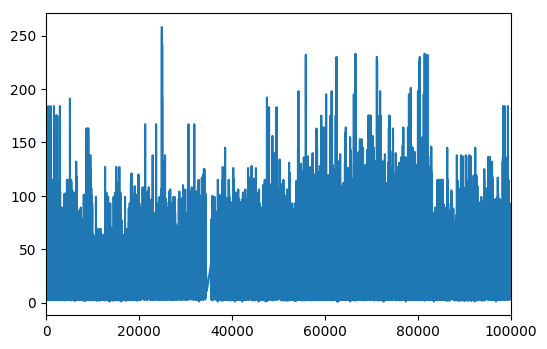

In [72]:
dfSubject['subject_length'].plot()

Subject length is quite distributive except more than 200 characters. Lets look into data to explore that.

In [82]:
for index, row in dfSubject[dfSubject['subject_length'] > 240].iterrows():
    print(row['Subject'])
    print('----------')

EB 32C2  EGM Exec. Staff Mtg w/ Mike McConnell, Jeff Shankman, Mark
 Frevert, Alan Aronowitz, Pierre Aury, Jeff Donahue, Gary Hickerson, Chris
 Mahoney, George McClellan, Jordan Mintz, Tom Myers, John nowlan, Jere
 Overdyke, Beth Perlman, Brent Price, Daniel
----------
EB-27-C-2- Associate Luncheon w/SB, GP, MP (Associates: Boon Lua,
 Edosa Obayagbona, Michael Mattox, Nadeem Abdullah, Shruti Gandhi-Gupta,
 Vikram Abhyankar, Sarah Goodpastor, Jennifer Smith, Jon Henderlong, Sunjay
 Arya, (Teseo Bergoglio-N/A-Brazil)
----------
Tax In-House Mtg. w/University Professors - SBeck presentation 2:00
 - 2:15pm (Begin w/Working Lunch thru Astros game in PM) Presentation to
 incl.  1) Overview of department 2) Opportunities you have 3) How industry
 is different from big 5
----------


In my experience, I seen many subjects like this in emails so we can not ignore this :/

In [30]:
pd.isna(df['Subject']).head()

0     True
2    False
3     True
4    False
5    False
Name: Subject, dtype: bool

In [31]:
NanSubjectDF = df[pd.isna(df['Subject'])]
NanSubjectDF.shape

(5321, 52)

In [84]:
NotNanSubjectDF = df[pd.notna(df['Subject'])]
NotNanSubjectDF.shape

(94636, 52)

In [85]:
#Do we need to drop of 5364 data ? 

In [86]:
df['labeled'].describe()

count     100000
unique         2
top        False
freq       99790
Name: labeled, dtype: object

In [87]:
df[ df['labeled'] == True].shape

(210, 52)

In [88]:
#Why label ? What type of emails labelled ?

In [89]:
df[df['labeled']== True]['Subject'].head()

379         Re: Confidential Employee Information/Lenhart
381     RE: PERSONAL AND CONFIDENTIAL COMPENSATION INF...
2139    FW: Western Wholesale Activities - Gas & Power...
2140    FW: Western Wholesale Activities - Gas & Power...
2232    FW: Western Wholesale Activities - Gas & Power...
Name: Subject, dtype: object

In [90]:
df[df['labeled']== True]['content'].head()

379     I also need to know the base salaries of Jay R...
381     Thanks for the information. It would be helpfu...
2139    -----Original Message----- From: Hawkins, Bern...
2140    -----Original Message----- From: Perrino, Dave...
2232    -----Original Message----- From: Comnes, Alan ...
Name: content, dtype: object

In [91]:
df['user'].describe()

count         100000
unique            30
top       dasovich-j
freq           28234
Name: user, dtype: object

In [92]:
df['user'].unique()

array(['allen-p', 'arnold-j', 'arora-h', 'badeer-r', 'bailey-s', 'bass-e',
       'baughman-d', 'beck-s', 'benson-r', 'blair-l', 'brawner-s',
       'buy-r', 'campbell-l', 'carson-m', 'cash-m', 'causholli-m',
       'corman-s', 'crandell-s', 'cuilla-m', 'dasovich-j', 'davis-d',
       'dean-c', 'delainey-d', 'derrick-j', 'dickson-s', 'donoho-l',
       'donohoe-t', 'dorland-c', 'ermis-f', 'farmer-d'], dtype=object)

In [93]:
#plot the histogram of count of the emails sent from specific user like in describe we got 28K mails has user "dasovich-j"

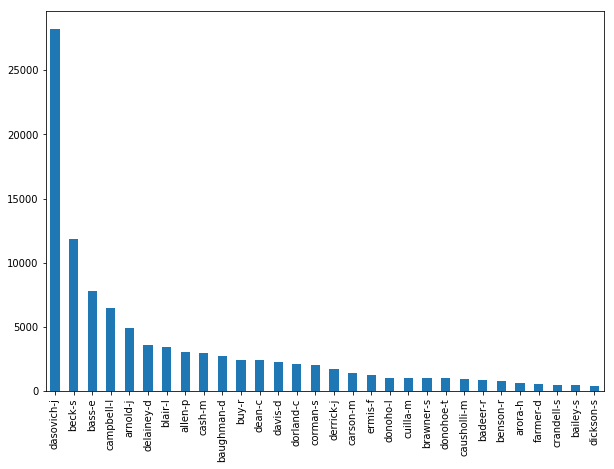

In [98]:
rcParams['figure.figsize'] = 10, 7
pd.value_counts(df['user']).plot.bar()